In [1]:
path = '../../Data/data/'

In [2]:
#import necessary packages 
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from pandas import ExcelFile


## Now load the questionnaire related data from OUH and AUH 

In [3]:
#load the GN data files from AUH and OUH
with open(path + 'WP4_OUH_GN_TPI.csv') as input: 
    WP4_OUH_GN = pd.read_csv(input)
with open(path + 'WP4_AUH_GN_TPI.csv') as input: 
    WP4_AUH_GN = pd.read_csv(input)
print('WP4 GN data loaded')

#load the Oticon data files from AUH and OUH
with open(path + 'WP4_OUH_Oticon_TPI.csv') as input: 
    WP4_OUH_GN = pd.read_csv(input)
with open(path + 'WP4_AUH_Oticon_TPI.csv') as input: 
    WP4_AUH_GN = pd.read_csv(input)
print('WP4 Oticon data loaded')

#load the Widex data files from AUH and OUH
with open(path + 'WP4_OUH_Widex_TPI.csv') as input: 
    WP4_OUH_Widex = pd.read_csv(input)
with open(path + 'WP4_AUH_Widex_TPI.csv') as input: 
    WP4_AUH_Widex = pd.read_csv(input)
print('WP4 Widex data loaded')



WP4 GN data loaded
WP4 Oticon data loaded
WP4 Widex data loaded


In [4]:
WP4_AUH_GN.head(20)

,Unnamed: 0,RC_ID,ds_re,ds_le,srt_re,srt_le,ac_re_250hz,ac_re_500hz,ac_re_1000hz,ac_re_2000hz,...,visit_4_fitting report,hint_srt_v4,sound_id_pct_v4,noise_ann_number_v4,noise_ann_critic_v4,spa_hea_direc_v4,spa_hea_w_reg_v4,jfc_srt_v4,comments,schedule_complete
0,1,WP4-365-0016,100,96,15,10,20,25,15,30,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,WP4-365-0017,88,100,25,20,30,25,25,30,...,Yes,-2.2,93.0,7.0,1.0,76.0,100.0,8.8,NaN,NaN
2,3,WP4-365-0027,96,96,10,15,10,15,20,30,...,Yes,-1.3,93.0,7.0,0.0,72.0,100.0,5.6,NaN,NaN
3,4,WP4-365-0030,84,92,20,20,15,20,25,50,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,WP4-365-0031,96,96,5,5,15,10,10,35,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,WP4-365-0032,100,88,35,25,25,35,45,35,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,WP4-365-0033,88,84,10,20,10,10,25,55,...,Yes,0.1,80.0,7.0,0.0,56.0,92.0,7.2,NaN,NaN


In [5]:
#merge the AUH and OUH data
WP4_GN = pd.concat([WP4_OUH_GN, WP4_AUH_GN],axis=0).reset_index().drop(['index','Unnamed: 0'],axis=1)

In [6]:
WP4_GN['RC_ID']

0            364-2
1            364-4
2            364-6
3            364-8
4           364-10
5           364-12
6           364-14
7           364-16
8           364-18
9           364-72
10          364-80
11         364-110
12         364-114
13         364-118
14         364-126
15    WP4-365-0016
16    WP4-365-0017
17    WP4-365-0027
18    WP4-365-0030
19    WP4-365-0031
20    WP4-365-0032
21    WP4-365-0033
Name: RC_ID, dtype: object

In [7]:
WP4_GN.keys()[:30]

Index(['RC_ID', 'ds_re', 'ds_le', 'srt_re', 'srt_le', 'ac_re_250hz',
       'ac_re_500hz', 'ac_re_1000hz', 'ac_re_2000hz', 'ac_re_3000hz',
       'ac_re_4000hz', 'ac_re_6000hz', 'ac_re_8000hz', 'ac_le_250hz',
       'ac_le_500hz', 'ac_le_1000hz', 'ac_le_2000hz', 'ac_le_3000hz',
       'ac_le_4000hz', 'ac_le_6000hz', 'ac_le_8000hz', 'Region', 'sex', 'age',
       'Profile', 'hint_srt_re', 'hint_srt_le', 'hint_srt_bin',
       'acalos_htl_re_250hz', 'acalos_htl_re_500hz'],
      dtype='object')

## From here on do the REM analysis

In [21]:
path = '../../Data/REM/WP4/'
#path = 'C:/Users/boko/OneDrive - WSA/Documents/BEAR/BEAR_pilot_data/WIDEX REM Files OUH/'

In [41]:
#load all the GN REM data files from sharepoint
import os
#text_files = [f for f in os.listdir(path) if f.endswith('.txt')]
text_files = [f for f in os.listdir(path) if f.endswith('first fit.txt')]

REM = {}
REM_ = []
cnt = 0
for f in text_files:
    print(path+f)
    REM[cnt] = pd.read_csv(path + f,sep=';', skipinitialspace=True, index_col=False)
    #REM[cnt].drop('RC_ID', axis=1, inplace = True)
    REM_.append(pd.DataFrame(REM[cnt]))
    cnt += 1
df_REM = pd.concat(REM_)

../../Data/REM/WP4/WP4-364-102 first fit.txt
../../Data/REM/WP4/WP4-364-104 first fit.txt
../../Data/REM/WP4/WP4-364-112 first fit.txt
../../Data/REM/WP4/WP4-364-120 first fit.txt
../../Data/REM/WP4/WP4-364-42 first fit.txt
../../Data/REM/WP4/WP4-364-44 first fit.txt
../../Data/REM/WP4/WP4-364-50 first fit.txt
../../Data/REM/WP4/WP4-364-56 first fit.txt
../../Data/REM/WP4/WP4-364-58 first fit.txt
../../Data/REM/WP4/WP4-364-60 first fit.txt
../../Data/REM/WP4/WP4-364-62 first fit.txt
../../Data/REM/WP4/WP4-364-78 first fit.txt
../../Data/REM/WP4/WP4-364-82 first fit.txt
../../Data/REM/WP4/WP4-364-84 first fit.txt
../../Data/REM/WP4/WP4-364-86 first fit.txt
../../Data/REM/WP4/WP4-364-96 first fit.txt
../../Data/REM/WP4/WP4-364-98 first fit.txt
../../Data/REM/WP4/WP4-365-0036 first fit.txt
../../Data/REM/WP4/WP4-365-0039 first fit.txt


In [44]:
df_REM[df_REM['RC_ID']=='364-102_GN_REM_fitting'].head()

,RC_ID,Test,Ear,86,129,172,215,258,301,344,...,9589,9632,9675,9718,9761,9804,9847,9890,9933,9976
0,364-102_GN_REM_fitting,REUG 70,Left,1.438093,1.324020,0.883365,-0.021257,-0.059923,-0.386902,-0.286832,...,10.600741,10.610363,10.677523,11.285276,10.145251,9.798104,11.249280,10.813911,8.210300,10.750199
1,364-102_GN_REM_fitting,REUG 70,Right,-2.202479,0.683090,-0.035945,-0.724197,-0.728124,-0.682361,0.088095,...,11.676009,10.057650,8.965311,8.677676,6.960003,5.715365,4.743342,3.608405,2.838271,5.204617
2,364-102_GN_REM_fitting,REOG 70,Left,1.841995,1.786458,1.353285,0.402691,0.376287,0.289174,0.933812,...,-5.366306,-4.512492,-3.824217,-2.722098,-2.244825,-1.990264,-1.829639,-1.552924,-0.761120,5.203114
3,364-102_GN_REM_fitting,REOG 70,Right,-1.878099,1.081527,0.400754,-0.307823,-0.242635,-0.067815,0.728839,...,0.351311,-0.571790,-1.277498,-1.430736,-2.281214,-3.390405,-3.825498,-3.265939,-3.253207,-0.206017
4,364-102_GN_REM_fitting,REIG 65,Left,0.218371,0.438723,0.103804,-0.077036,0.130339,0.555835,0.362106,...,-12.805224,-12.675739,-13.441301,-13.170106,-10.453849,-10.405567,-12.444864,-11.684086,-8.502076,-7.213942


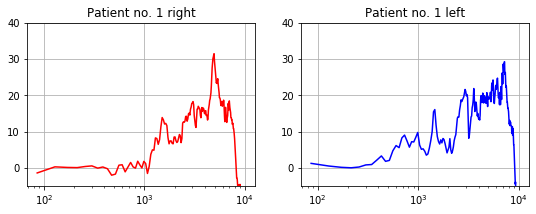

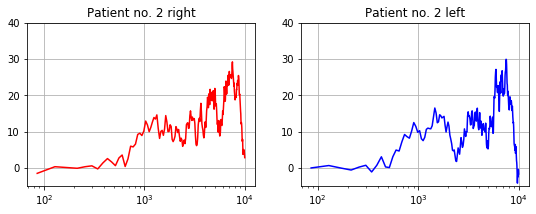

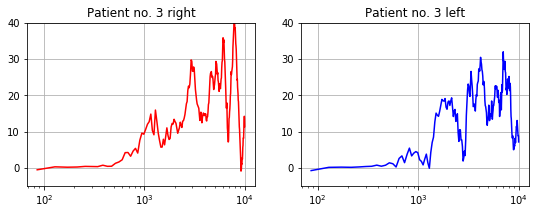

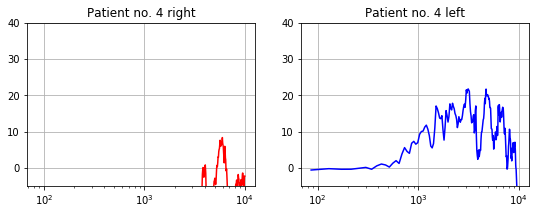

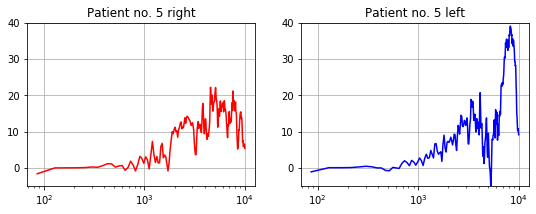

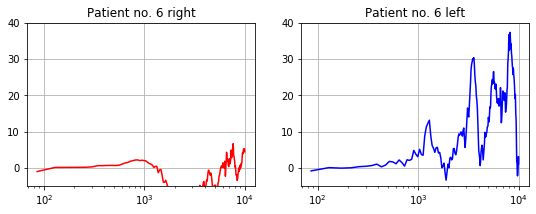

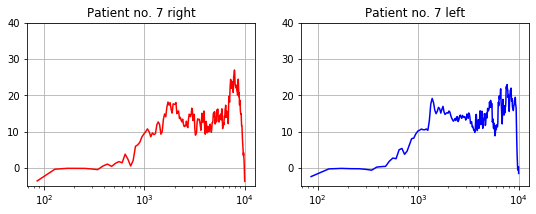

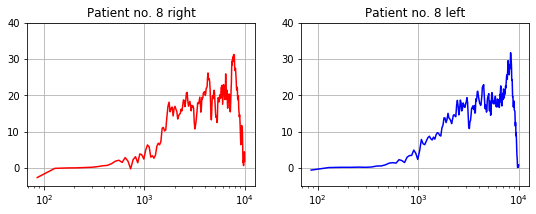

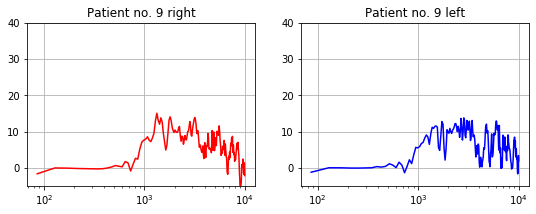

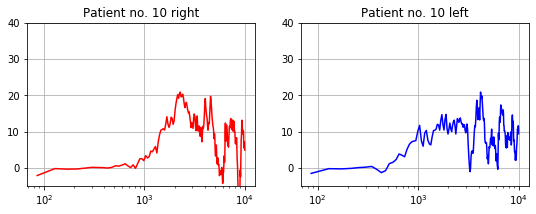

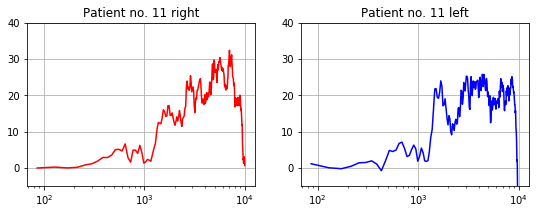

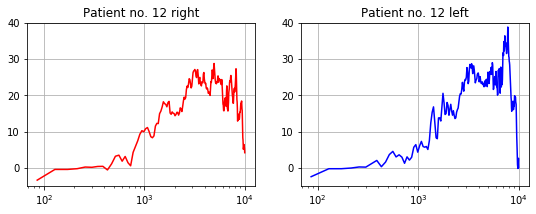

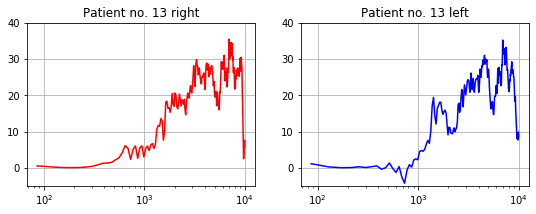

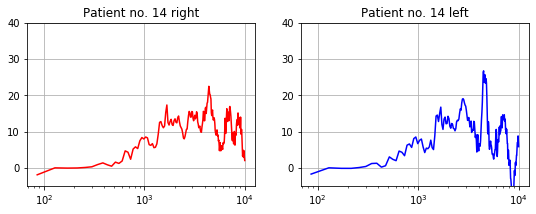

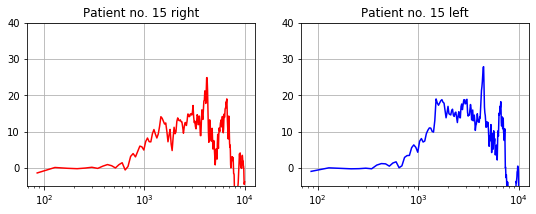

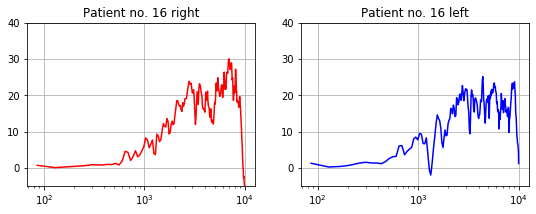

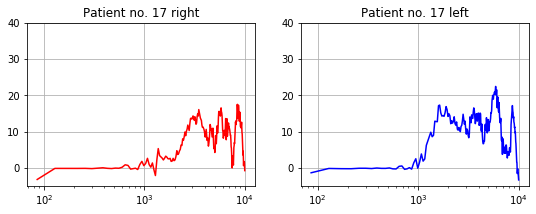

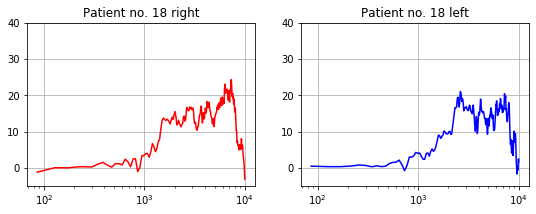

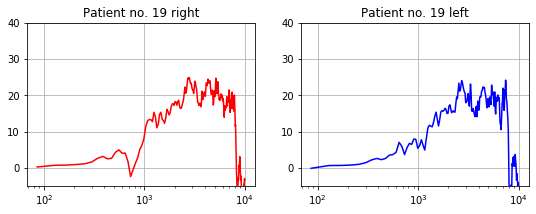

In [45]:
for patient_idx in range(len(text_files)):
    df = REM[patient_idx]

    freqs_s = list(df.columns)
    freqs_s = freqs_s[3:]
    freqs = [float(s) for s in freqs_s]

    id_right = np.max(np.where( (df[['Test']] == 'REIG 65').values * (df[['Ear']] == 'Right').values ))
    id_left = np.max(np.where( (df[['Test']] == 'REIG 65').values * (df[['Ear']] == 'Left').values ))
    
    plt.figure(figsize=(9,3))
    plt.subplot(1,2,2)
    plt.semilogx(freqs,df.iloc[id_left,3:],'b')
    plt.grid()
    plt.title(f"Patient no. {patient_idx+1} left")
    plt.ylim(-5, 40)

    plt.subplot(1,2,1)
    plt.semilogx(freqs,df.iloc[id_right,3:],'r')
    plt.grid()
    plt.title(f"Patient no. {patient_idx+1} right")
    plt.ylim(-5, 40)


## Target analysis - draft

In [12]:
def calculateBEARtarget(audiogram, profile):
    betas = dict()
    betas['A'] = np.array([[0, 0, 1, 5, 5, 3, 3],
                           [0, 0, -2, 0, 0, 0, 0],
                           [0, 0, -5, -5, -5, -5, -5]])
    betas['B'] = np.array([[-3, -3, 1, 5, 5, 7, 7],
                           [-3, -3, -2, 0, 0, 0, 0],
                           [-6, -6, -9, -9, -9, -9, -9]])
    betas['C'] = np.array([[-2, -1.3, 1, 4, 7, 7, 7],
                           [-10, -10, -5, 0, 0, 0, 0],
                           [-14, -14, -14, -14, -14, -14, -14]])
    betas['D'] = np.array([[0, 0, 0, 3, 2, 2, 2],
                           [-6, -6, -6, -3, -3, -3, -3],
                           [-10, -10, -10, -10, -14, -14, -14]])
    target = 0.31*np.array([audiogram, audiogram, audiogram]) + betas[profile]
    
    target[target < 0] = 0

    return target

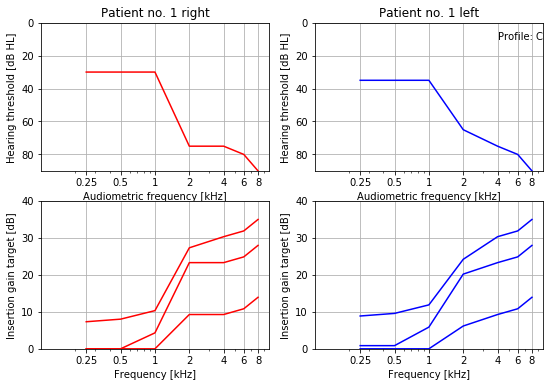

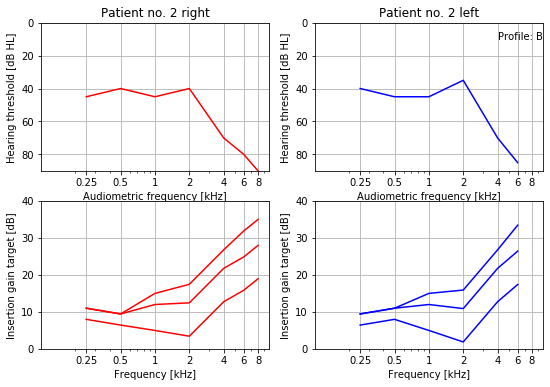

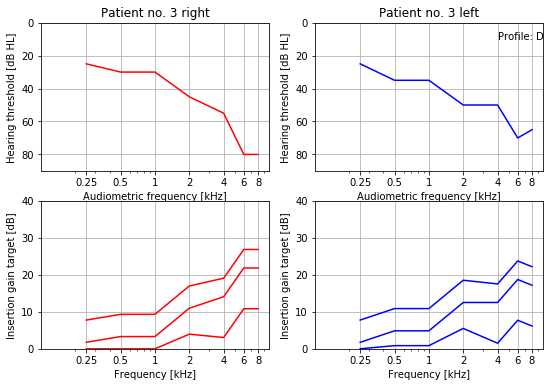

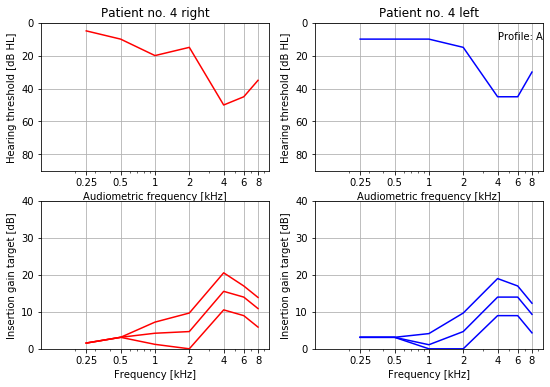

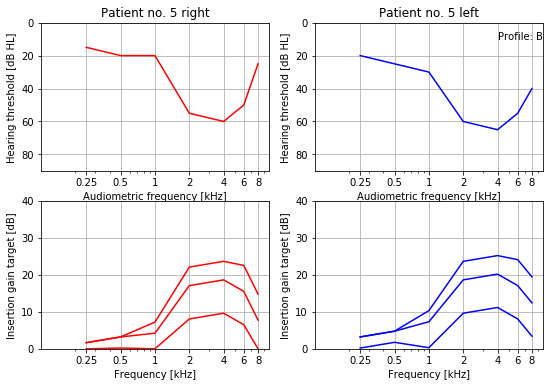

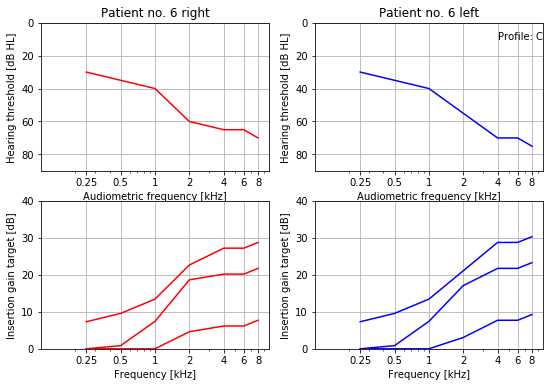

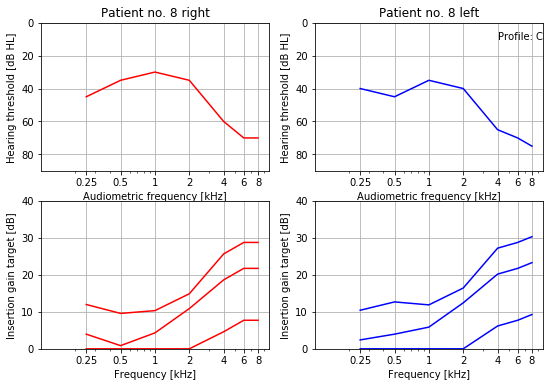

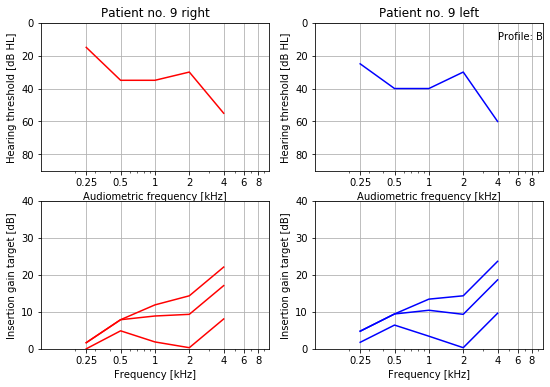

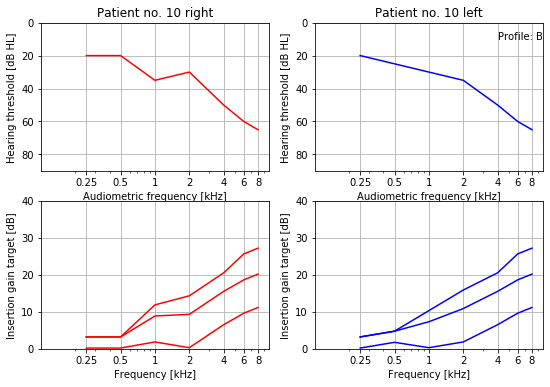

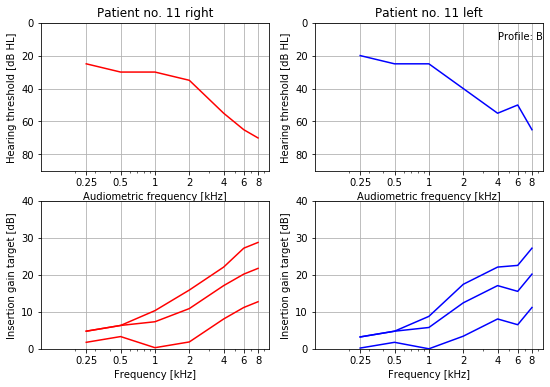

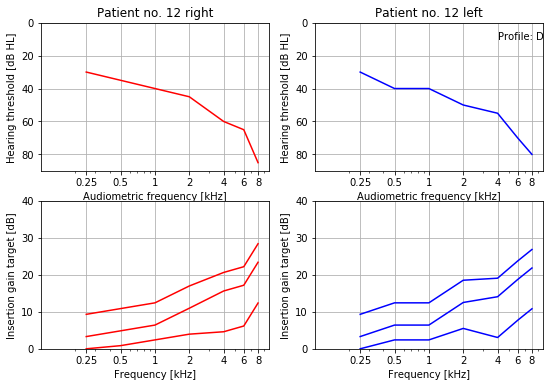

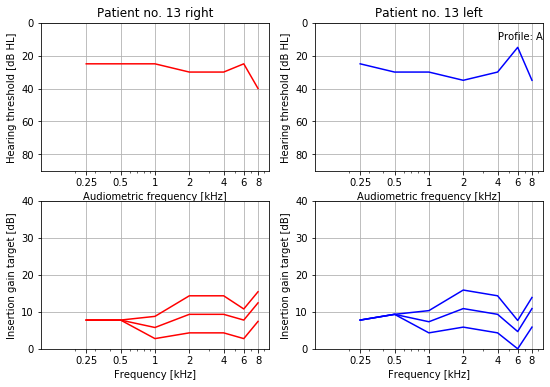

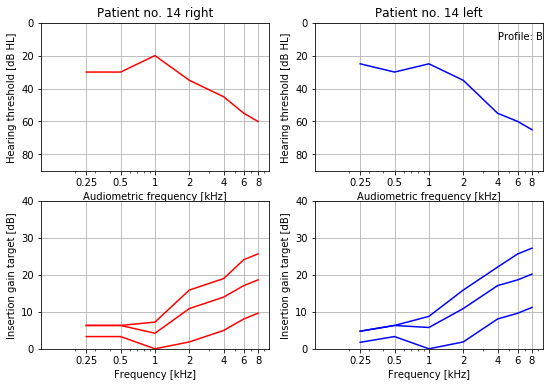

In [47]:
path = '../../Data/data/'
#path = 'C:/Users/boko/OneDrive - WSA/Documents/BEAR/BEAR_pilot_data/'
df = pd.read_excel(path+'WP4 Pilots Data OUH_Widex.xlsx')
nrows, _ = df.shape

freqs_audio_no3k = [250, 500, 1000, 2000, 4000, 6000, 8000]


for patient_idx in range(nrows):
    audio_left  = pd.concat([df.iloc[patient_idx,5:9], df.iloc[patient_idx,10:13]])
    audio_right = pd.concat([df.iloc[patient_idx,13:17], df.iloc[patient_idx,18:21]])
    profile = df.iloc[patient_idx, 24]
    
    if profile == 'O':
        continue
    
    target_left = calculateBEARtarget(np.array(audio_left), profile)
    target_right = calculateBEARtarget(np.array(audio_right), profile)
    
    plt.figure(figsize=(9,6))
    plt.subplot(2,2,1)
    plt.semilogx(freqs_audio_no3k,-audio_right,'r')
    plt.grid()
    plt.title(f"Patient no. {patient_idx+1} right")
    plt.ylim(-90, 0)
    plt.xlim(100, 10000)
    plt.xticks(freqs_audio_no3k, [.25, .5, 1, 2, 4, 6, 8])
    plt.yticks([0, -20, -40, -60, -80], [0, 20, 40, 60, 80])
    plt.xlabel('Audiometric frequency [kHz]')
    plt.ylabel('Hearing threshold [dB HL]')
    
    plt.subplot(2,2,2)
    plt.semilogx(freqs_audio_no3k,-audio_left,'b')
    plt.grid()
    plt.title(f"Patient no. {patient_idx+1} left")
    plt.text(4000, -10, "Profile: "+profile)
    plt.ylim(-90, 0)
    plt.xlim(100, 10000)
    plt.xticks(freqs_audio_no3k, [.25, .5, 1, 2, 4, 6, 8])
    plt.yticks([0, -20, -40, -60, -80], [0, 20, 40, 60, 80])
    plt.xlabel('Audiometric frequency [kHz]')
    plt.ylabel('Hearing threshold [dB HL]')    
    
    
    plt.subplot(2,2,3)
    plt.semilogx(freqs_audio_no3k,target_right[0,:],'r')
    plt.semilogx(freqs_audio_no3k,target_right[1,:],'r')
    plt.semilogx(freqs_audio_no3k,target_right[2,:],'r')
    plt.grid()
    #plt.title(f"Patient no. {patient_idx+1} right")
    plt.ylim(0, 40)
    plt.xlim(100, 10000)
    plt.xticks(freqs_audio_no3k, [.25, .5, 1, 2, 4, 6, 8])
    plt.yticks([0, 10, 20, 30, 40], [0, 10, 20, 30, 40])
    plt.xlabel('Frequency [kHz]')
    plt.ylabel('Insertion gain target [dB]')
    
    plt.subplot(2,2,4)
    plt.semilogx(freqs_audio_no3k,target_left[0,:],'b')
    plt.semilogx(freqs_audio_no3k,target_left[1,:],'b')
    plt.semilogx(freqs_audio_no3k,target_left[2,:],'b')
    plt.grid()
    #plt.title(f"Patient no. {patient_idx+1} left")
    plt.ylim(0, 40)
    plt.xlim(100, 10000)
    plt.xticks(freqs_audio_no3k, [.25, .5, 1, 2, 4, 6, 8])
    plt.yticks([0, 10, 20, 30, 40], [0, 10, 20, 30, 40])
    plt.xlabel('Frequency [kHz]')
    plt.ylabel('Insertion gain target [dB]')


In [56]:

[df_REM['RC_ID'], df]

[0     364-102_GN_REM_fitting
 1     364-102_GN_REM_fitting
 2     364-102_GN_REM_fitting
 3     364-102_GN_REM_fitting
 4     364-102_GN_REM_fitting
                ...          
 7     WP4-365-0039 first fit
 8     WP4-365-0039 first fit
 9     WP4-365-0039 first fit
 10    WP4-365-0039 first fit
 11    WP4-365-0039 first fit
 Name: RC_ID, Length: 598, dtype: object,
       RC_ID  ds_re  ds_le  srt_re  srt_le  ac_re_250hz  ac_re_500hz  \
 0    364-22     40     60      35      30           35           35   
 1    364-26    100    100      35      35           40           45   
 2    364-28     96    100      30      30           25           35   
 3    364-34    100     88      10      10           10           10   
 4    364-36     88     96      20      15           20           25   
 5    364-40     88     88      35      30           30           35   
 6    364-64     56     76      45      40           40           35   
 7    364-66     92     72      40      30          